In [4]:
import pandas as pd
import numpy as np
import talib as ta
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression


# Import

In [5]:
D = pd.read_parquet('btcusd_hourly_price_indicators.parquet', engine='pyarrow')
D

,open,high,low,close,volume,return_forward,return,obv,sma_5,sma_10,...,rsi_14,atr_7,atr_14,atr_21,upper_band_10,middle_band_10,lower_band_10,upper_band_20,middle_band_20,lower_band_20
Timestamp,,,,,,,,,,,,,,,,,,,,,
2012-01-01 10:00:00,4.58,4.58,4.58,4.58,0.000000,0.000000,NaN,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 11:00:00,4.58,4.58,4.58,4.58,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 12:00:00,4.58,4.58,4.58,4.58,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 13:00:00,4.58,4.58,4.58,4.58,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 14:00:00,4.58,4.58,4.58,4.58,0.000000,0.000000,0.000000,0.000000,4.58,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 19:00:00,93760.00,94158.00,93600.00,94008.00,7.863550,-0.006308,0.002666,175364.391806,94342.20,94516.7,...,49.600999,787.401340,594.021005,490.327871,95801.067876,94516.7,93232.332124,95433.425204,94002.90,92572.374796
2024-12-31 20:00:00,94025.00,94059.00,93300.00,93415.00,4.565475,0.002858,-0.006308,175359.826331,93968.20,94461.6,...,42.325843,783.344006,605.805219,503.121782,95876.395307,94461.6,93046.804693,95435.711991,93998.40,92561.088009
2024-12-31 21:00:00,93386.00,93777.00,93336.00,93682.00,28.484950,-0.004142,0.002858,175388.311280,93768.80,94421.0,...,46.155291,734.437720,594.033418,500.163602,95898.271810,94421.0,92943.728190,95434.444994,94007.25,92580.055006


## Split Data for ML & DNN

In [6]:

# train = D.loc['2021-01-01':'2022-12-31']
# val = D.loc['2023-01-01':'2023-12-31']
# test = D.loc['2024-01-01':]

In [7]:
D = D.loc['2019-01-01':'2024-12-31']
D.tail()

,open,high,low,close,volume,return_forward,return,obv,sma_5,sma_10,...,rsi_14,atr_7,atr_14,atr_21,upper_band_10,middle_band_10,lower_band_10,upper_band_20,middle_band_20,lower_band_20
Timestamp,,,,,,,,,,,,,,,,,,,,,
2024-12-31 19:00:00,93760.0,94158.0,93600.0,94008.0,7.863550,-0.006308,0.002666,175364.391806,94342.2,94516.7,...,49.600999,787.401340,594.021005,490.327871,95801.067876,94516.7,93232.332124,95433.425204,94002.90,92572.374796
2024-12-31 20:00:00,94025.0,94059.0,93300.0,93415.0,4.565475,0.002858,-0.006308,175359.826331,93968.2,94461.6,...,42.325843,783.344006,605.805219,503.121782,95876.395307,94461.6,93046.804693,95435.711991,93998.40,92561.088009
2024-12-31 21:00:00,93386.0,93777.0,93336.0,93682.0,28.484950,-0.004142,0.002858,175388.311280,93768.8,94421.0,...,46.155291,734.437720,594.033418,500.163602,95898.271810,94421.0,92943.728190,95434.444994,94007.25,92580.055006
2024-12-31 22:00:00,93703.0,93703.0,93227.0,93294.0,67.859345,0.000933,-0.004142,175320.451936,93631.4,94307.8,...,41.810713,697.518045,585.602459,499.012954,95932.335823,94307.8,92683.264177,95441.599457,93996.70,92551.800543
2024-12-31 23:00:00,93300.0,93582.0,93237.0,93381.0,4.859937,0.000150,0.000933,175325.311873,93556.0,94101.5,...,43.103957,647.158325,568.416569,491.679004,95616.782482,94101.5,92586.217518,95444.819153,93990.50,92536.180847


## y_train (-1, 0, 1)

In [8]:
# print(train['return_forward'].min())
# print(train['return_forward'].max())

In [9]:
# Prediction of trading signal

# y_train = pd.DataFrame(np.where(train['return_forward']>0.01, 1, np.where(train['return_forward']<-0.01, -1, 0)),
#                        index=train.index,
#                        columns=['y_train']
#                       )

# y_train

# EDA & Feature Engineering

In [10]:
D.columns

Index(['open', 'high', 'low', 'close', 'volume', 'return_forward', 'return',
       'obv', 'sma_5', 'sma_10', 'sma_20', 'sma_50', 'sma_100', 'sma_200',
       'ema_5', 'ema_10', 'ema_20', 'ema_50', 'ema_100', 'ema_200',
       'macd_12_26', 'signal_line_9', 'macd_histogram', 'adx', '+di', '-di',
       'rsi_7', 'rsi_14', 'atr_7', 'atr_14', 'atr_21', 'upper_band_10',
       'middle_band_10', 'lower_band_10', 'upper_band_20', 'middle_band_20',
       'lower_band_20'],
      dtype='object')

In [11]:
# plt.figure(figsize=(10, 10))
# plt.plot(train_data['return_forward'])

## Correlation

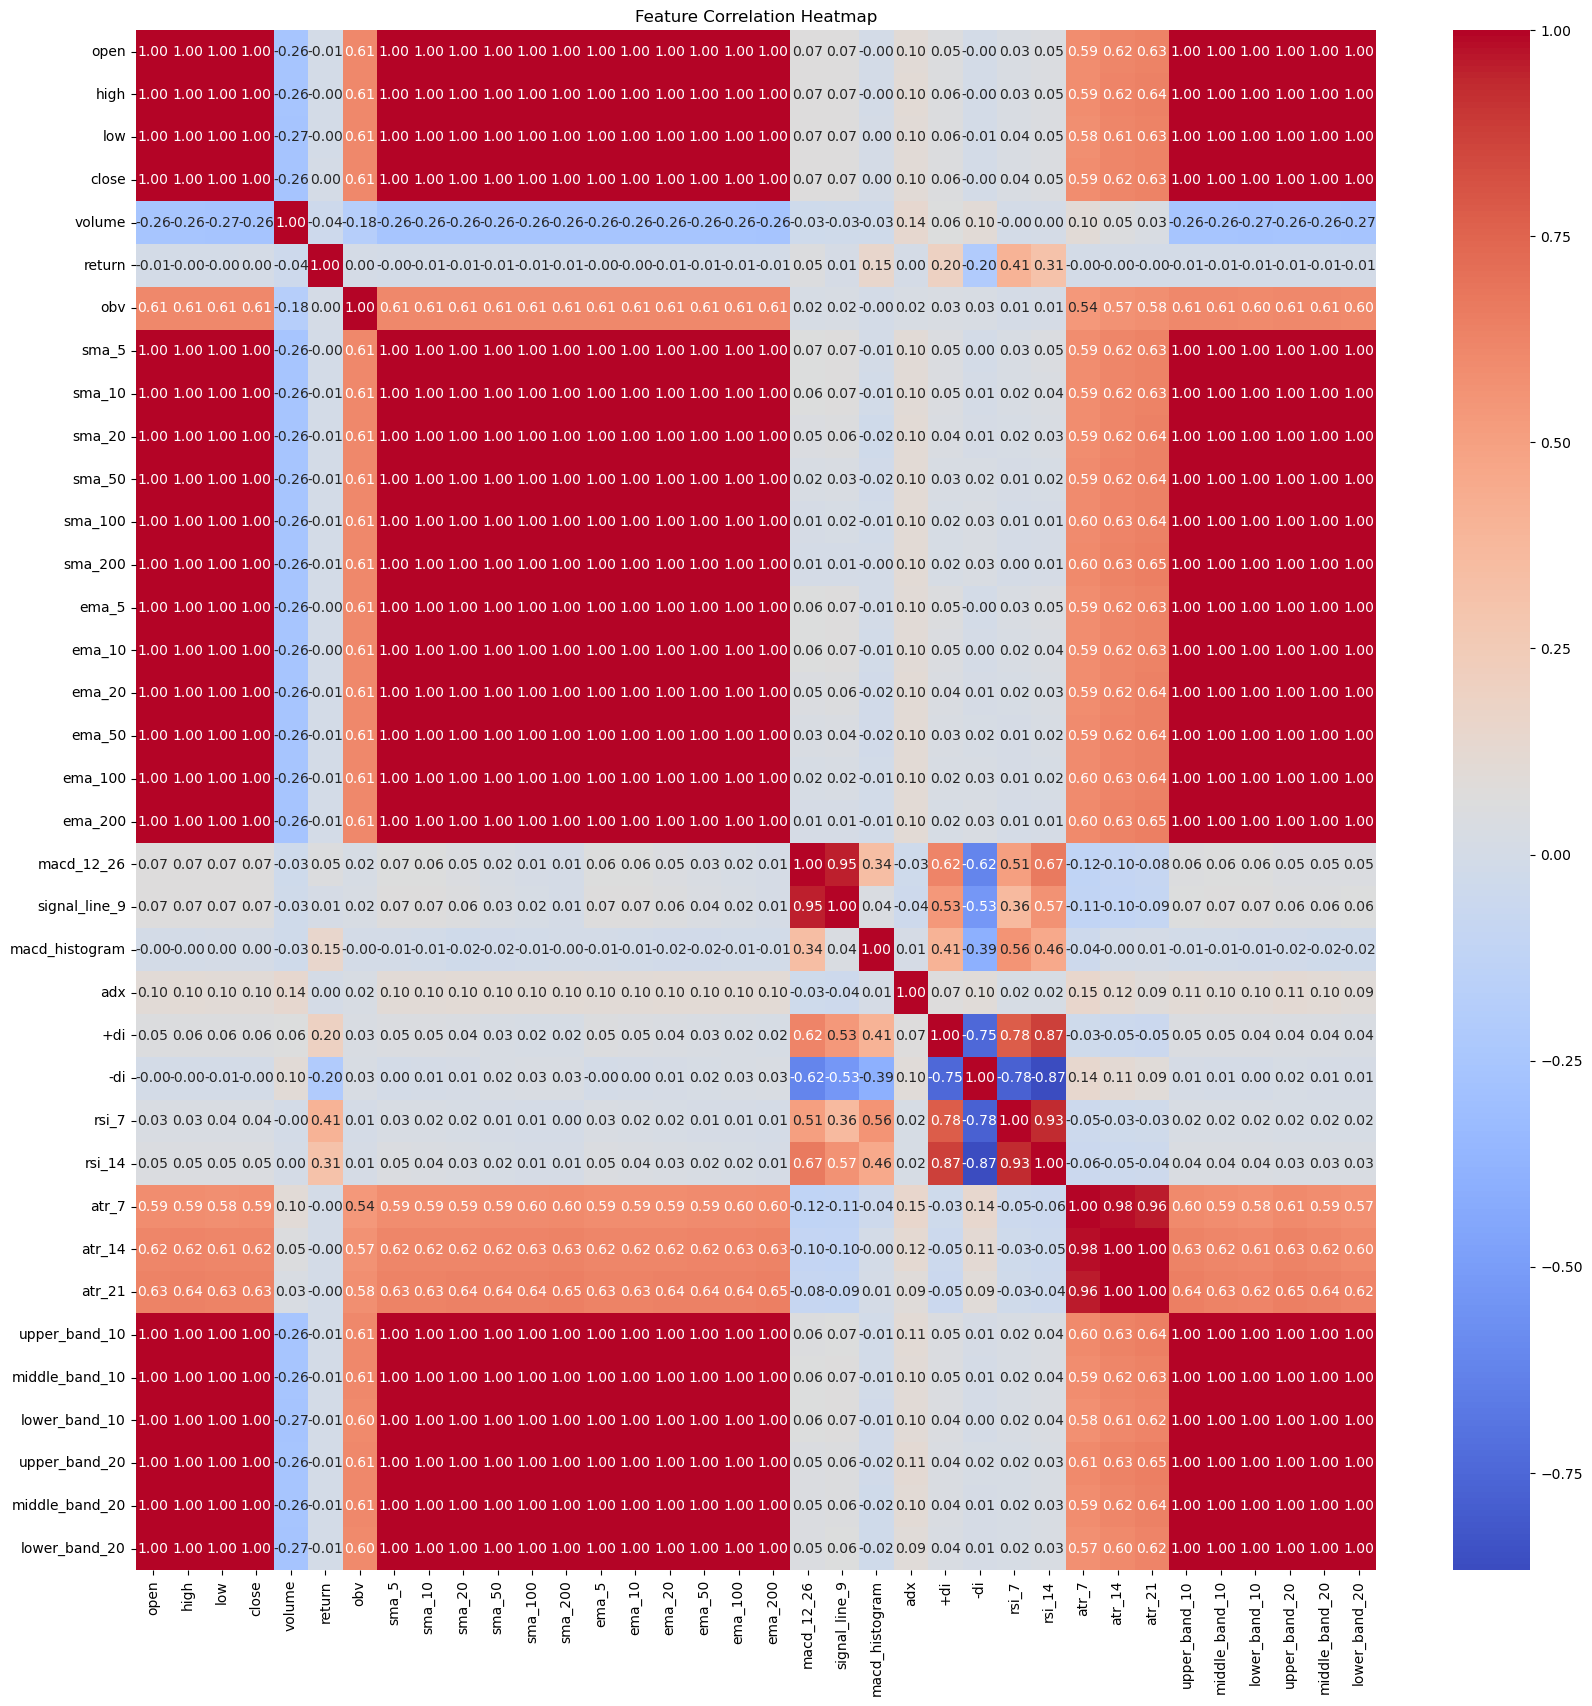

In [12]:
columns = D.drop(['return_forward'], axis=1)
corr_matrix = columns.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

## Moving Averages

In [13]:
# Manually drop some Moving Averages

D = D.drop(['sma_10','sma_100','ema_10','ema_100'], axis=1)


In [14]:
# Feature Engineering

def ma_features(df):
    val = [5,20,50,200]
    
    ma_diff = pd.DataFrame()
    
    for i in range(len(val)-1):
        short_ma = val[i]
        long_ma = val[i+1]
        ma_diff[f'sma_{short_ma}_{long_ma}_diff'] = df[f'sma_{short_ma}'] - df[f'sma_{long_ma}']
        
    for i in range(len(val)-1):
        short_ma = val[i]
        long_ma = val[i+1]
        ma_diff[f'ema_{short_ma}_{long_ma}_diff'] = df[f'ema_{short_ma}'] - df[f'ema_{long_ma}']

    for i in ma_diff:
        ma_diff[f'{i}_abs_chg'] = ma_diff[i].diff()
        ma_diff[f'{i}_pct_chg'] = ma_diff[i].pct_change()

    data = pd.concat([df[['sma_5', 'sma_20', 'sma_50', 'sma_200', 'ema_5', 'ema_20','ema_50', 'ema_200']],ma_diff], axis=1)
    return data

ma_features(D)    

,sma_5,sma_20,sma_50,sma_200,ema_5,ema_20,ema_50,ema_200,sma_5_20_diff,sma_20_50_diff,...,sma_20_50_diff_abs_chg,sma_20_50_diff_pct_chg,sma_50_200_diff_abs_chg,sma_50_200_diff_pct_chg,ema_5_20_diff_abs_chg,ema_5_20_diff_pct_chg,ema_20_50_diff_abs_chg,ema_20_50_diff_pct_chg,ema_50_200_diff_abs_chg,ema_50_200_diff_pct_chg
Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,3743.676,3772.0665,3790.0316,3825.98350,3735.053924,3767.175789,3784.651884,3789.510475,-28.3905,-17.9651,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 01:00:00,3725.658,3764.8990,3786.9426,3824.34620,3717.225950,3759.022857,3780.609457,3788.436440,-39.2410,-22.0436,...,-4.0785,0.227024,-1.45170,0.040379,-9.675042,0.301198,-4.110505,0.235207,-2.968392,0.610957
2019-01-01 02:00:00,3709.860,3759.2335,3783.7634,3822.69475,3704.150633,3751.306394,3776.585557,3787.337570,-49.3735,-24.5299,...,-2.4863,0.112790,-1.52775,0.040845,-5.358854,0.128212,-3.692562,0.171058,-2.925030,0.373711
2019-01-01 03:00:00,3695.830,3754.4765,3780.1568,3821.25485,3695.403755,3744.316261,3772.715928,3786.248739,-58.6465,-25.6803,...,-1.1504,0.046898,-2.16670,0.055654,-1.756745,0.037254,-3.120503,0.123442,-2.780798,0.258630
2019-01-01 04:00:00,3684.338,3749.8465,3775.8398,3820.08230,3694.702504,3739.457570,3769.601577,3785.323876,-65.5085,-25.9933,...,-0.3130,0.012188,-3.14445,0.076511,4.157440,-0.084997,-1.744341,0.061421,-2.189487,0.161791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 19:00:00,94342.200,94002.9000,93690.0400,95406.80500,94208.917308,94116.667231,94001.883659,95488.516399,339.3000,312.8600,...,20.7900,0.071182,13.37500,-0.007731,-89.019998,-0.491090,-11.688302,-0.092418,15.129208,-0.010074
2024-12-31 20:00:00,93968.200,93998.4000,93688.5000,95392.94000,93944.278205,94049.841781,93978.868614,95467.884395,-30.2000,309.9000,...,-2.9600,-0.009461,12.32500,-0.007179,-197.813652,-2.144320,-43.810405,-0.381678,-2.383041,0.001603
2024-12-31 21:00:00,93768.800,94007.2500,93693.5200,95387.55500,93856.852137,94014.809230,93967.226707,95450.114401,-238.4500,313.7300,...,3.8300,0.012359,10.40500,-0.006105,-52.393518,0.496322,-23.390644,-0.329570,6.128088,-0.004116


## MACD

In [15]:
D[['macd_12_26', 'signal_line_9', 'macd_histogram']].tail()

,macd_12_26,signal_line_9,macd_histogram
Timestamp,,,
2024-12-31 19:00:00,201.771394,223.884683,-22.113289
2024-12-31 20:00:00,120.497438,203.207234,-82.709795
2024-12-31 21:00:00,76.747218,177.915231,-101.168013
2024-12-31 22:00:00,10.643800,144.460944,-133.817144
2024-12-31 23:00:00,-34.327752,108.703205,-143.030958


In [16]:
def macd_features(df):
    data = df[['macd_12_26', 'signal_line_9', 'macd_histogram']]
    data['macd_position'] = np.where(df['macd_histogram']>0, 1, -1)

    data['macd_crossover'] = np.NaN
    
    for i in range(1, len(data)):
        t = data.iloc[i,:].name
        t_1 = data.iloc[i-1,:].name

        if data.loc[t,'macd_position'] > 0 and data.loc[t_1, 'macd_position'] < 0:    
            data.loc[t,'macd_crossover'] = 1 * data.loc[t,'macd_histogram']
        if data.loc[t,'macd_position'] < 0 and data.loc[t_1, 'macd_position'] > 0:    
            data.loc[t,'macd_crossover'] = -1 * data.loc[t,'macd_histogram']
        elif data.loc[t,'macd_position'] == data.loc[t_1, 'macd_position']:
            data.loc[t, 'macd_crossover'] = 0

    
 
    return data
    
macd_features(D)

C:\Users\User\AppData\Local\Temp\ipykernel_19388\2289636833.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['macd_position'] = np.where(df['macd_histogram']>0, 1, -1)
C:\Users\User\AppData\Local\Temp\ipykernel_19388\2289636833.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['macd_crossover'] = np.NaN


,macd_12_26,signal_line_9,macd_histogram,macd_position,macd_crossover
Timestamp,,,,,
2019-01-01 00:00:00,-17.973099,-11.887622,-6.085477,-1,NaN
2019-01-01 01:00:00,-22.518059,-14.013709,-8.504350,-1,0.000000
2019-01-01 02:00:00,-26.107095,-16.432386,-9.674709,-1,0.000000
2019-01-01 03:00:00,-28.628681,-18.871645,-9.757036,-1,0.000000
2019-01-01 04:00:00,-29.050338,-20.907384,-8.142954,-1,0.000000
...,...,...,...,...,...
2024-12-31 19:00:00,201.771394,223.884683,-22.113289,-1,22.113289
2024-12-31 20:00:00,120.497438,203.207234,-82.709795,-1,0.000000
2024-12-31 21:00:00,76.747218,177.915231,-101.168013,-1,0.000000


## ADX

In [17]:
D[['adx','+di','-di']].tail()

,adx,+di,-di
Timestamp,,,
2024-12-31 19:00:00,40.943650,24.672194,28.601038
2024-12-31 20:00:00,38.995557,22.464248,29.578700
2024-12-31 21:00:00,37.186614,21.273029,28.010220
2024-12-31 22:00:00,35.678569,20.037920,27.713473
2024-12-31 23:00:00,34.278242,19.169206,26.511996


In [18]:
def adx_features(df):
    data = df[['adx','+di','-di']]
    data['adx_slope'] = data['adx'].diff(3) / 3
    data['adx_strength'] = np.where(data['adx'] > 25, 1, -1)
    data['di_crossover'] = np.where(data['+di'] > data['-di'], 1, -1)
    data['di_spread'] = data['+di'] - df['-di']
    data['adx_di_composite'] = data['adx'] * data['di_spread']
    
    return data

adx_features(D)    

C:\Users\User\AppData\Local\Temp\ipykernel_19388\127296441.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['adx_slope'] = data['adx'].diff(3) / 3
C:\Users\User\AppData\Local\Temp\ipykernel_19388\127296441.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['adx_strength'] = np.where(data['adx'] > 25, 1, -1)
C:\Users\User\AppData\Local\Temp\ipykernel_19388\127296441.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

,adx,+di,-di,adx_slope,adx_strength,di_crossover,di_spread,adx_di_composite
Timestamp,,,,,,,,
2019-01-01 00:00:00,18.858875,12.331020,37.634939,NaN,-1,-1,-25.303919,-477.203458
2019-01-01 01:00:00,21.129121,11.755209,35.877534,NaN,-1,-1,-24.122324,-509.683510
2019-01-01 02:00:00,23.278651,11.231858,34.821612,NaN,-1,-1,-23.589755,-549.137657
2019-01-01 03:00:00,25.321905,10.640248,33.587426,2.154343,1,-1,-22.947178,-581.066265
2019-01-01 04:00:00,26.733853,12.258722,32.390844,1.868244,1,-1,-20.132122,-538.209176
...,...,...,...,...,...,...,...,...
2024-12-31 19:00:00,40.943650,24.672194,28.601038,-2.859385,1,-1,-3.928844,-160.861213
2024-12-31 20:00:00,38.995557,22.464248,29.578700,-2.472413,1,-1,-7.114452,-277.432001
2024-12-31 21:00:00,37.186614,21.273029,28.010220,-2.113083,1,-1,-6.737191,-250.533326


## RSI

In [19]:
def rsi_features(df):
    data = df[['rsi_7','rsi_14']]
    data['rsi_7_slope'] = data['rsi_7'].diff(3) / 3
    data['rsi_7_chg'] = data['rsi_7'].pct_change()
    data['rsi_7_acceleration'] = data['rsi_7_slope'].diff(3)
    data['rsi_14_slope'] = data['rsi_14'].diff(3) / 3
    data['rsi_14_chg'] = data['rsi_14'].pct_change()
    data['rsi_14_acceleration'] = data['rsi_14_slope'].diff(3)
    data['rsi_ratio'] = data['rsi_7'] / data['rsi_14']

    
    return data

rsi_features(D)

C:\Users\User\AppData\Local\Temp\ipykernel_19388\2072152129.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rsi_7_slope'] = data['rsi_7'].diff(3) / 3
C:\Users\User\AppData\Local\Temp\ipykernel_19388\2072152129.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rsi_7_chg'] = data['rsi_7'].pct_change()
C:\Users\User\AppData\Local\Temp\ipykernel_19388\2072152129.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,rsi_7,rsi_14,rsi_7_slope,rsi_7_chg,rsi_7_acceleration,rsi_14_slope,rsi_14_chg,rsi_14_acceleration,rsi_ratio
Timestamp,,,,,,,,,
2019-01-01 00:00:00,23.701746,32.272252,NaN,NaN,NaN,NaN,NaN,NaN,0.734431
2019-01-01 01:00:00,22.064057,31.035987,NaN,-0.069096,NaN,NaN,-0.038307,NaN,0.710918
2019-01-01 02:00:00,21.404541,30.554195,NaN,-0.029891,NaN,NaN,-0.015524,NaN,0.700543
2019-01-01 03:00:00,21.385740,30.541323,-0.772002,-0.000878,NaN,-0.576976,-0.000421,NaN,0.700223
2019-01-01 04:00:00,33.107654,35.541984,3.681199,0.548118,NaN,1.501999,0.163734,NaN,0.931508
...,...,...,...,...,...,...,...,...,...
2024-12-31 19:00:00,44.656824,49.600999,-3.974927,0.165671,5.937768,-3.453649,0.079101,3.063338,0.900321
2024-12-31 20:00:00,34.760191,42.325843,-2.410577,-0.221615,12.558534,-2.186809,-0.146674,8.230798,0.821252
2024-12-31 21:00:00,41.563036,46.155291,1.084357,0.195708,13.751857,0.063397,0.090475,9.195450,0.900504


## ATR

In [20]:
D = D.drop(['atr_21'], axis=1)

In [21]:
def atr_features(df):
    data = df[['atr_7', 'atr_14']]

    data['atr_7_slope'] = data['atr_7'].diff(3) / 3
    data['atr_7_chg'] = data['atr_7'].pct_change()
    data['atr_14_slope'] = data['atr_14'].diff(3) / 3
    data['atr_14_chg'] = data['atr_14'].pct_change()
    data['price_change'] = df['close'].diff(1)
    data['norm_price_change_7'] = data['price_change'] / data['atr_7']
    data['norm_price_change_14'] = data['price_change'] / data['atr_14']
    data['atr_ratio'] = data['atr_7']/ data['atr_14']

    data['trailing_stop_long_7'] = df['high'] - 2 * df['atr_7']
    data['trailing_stop_long_14'] = df['high'] - 2 * df['atr_14']
    data['trailing_stop_short_7'] = df['low'] + 2 * df['atr_7']
    data['trailing_stop_short_14'] = df['low'] + 2 * df['atr_14']
    data.drop(['price_change'], axis=1, inplace=True)
    return data

atr_features(D)

C:\Users\User\AppData\Local\Temp\ipykernel_19388\482305488.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['atr_7_slope'] = data['atr_7'].diff(3) / 3
C:\Users\User\AppData\Local\Temp\ipykernel_19388\482305488.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['atr_7_chg'] = data['atr_7'].pct_change()
C:\Users\User\AppData\Local\Temp\ipykernel_19388\482305488.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,atr_7,atr_14,atr_7_slope,atr_7_chg,atr_14_slope,atr_14_chg,norm_price_change_7,norm_price_change_14,atr_ratio,trailing_stop_long_7,trailing_stop_long_14,trailing_stop_short_7,trailing_stop_short_14
Timestamp,,,,,,,,,,,,,
2019-01-01 00:00:00,48.682294,43.625397,NaN,NaN,NaN,NaN,NaN,NaN,1.115916,3654.645413,3664.759207,3727.364587,3717.250793
2019-01-01 01:00:00,45.696252,42.493583,NaN,-0.061337,NaN,-0.025944,-0.204393,-0.219798,1.075368,3599.387496,3605.792835,3754.522504,3748.117165
2019-01-01 02:00:00,42.845359,41.296898,NaN,-0.062388,NaN,-0.028162,-0.083323,-0.086447,1.037496,3600.049283,3603.146204,3745.690717,3742.593796
2019-01-01 03:00:00,40.988879,40.479263,-2.564472,-0.043330,-1.048711,-0.019799,-0.002196,-0.002223,1.012590,3604.472242,3605.491475,3738.577758,3737.558525
2019-01-01 04:00:00,37.910468,38.976458,-2.595261,-0.075104,-1.172375,-0.037125,0.405956,0.394854,0.972650,3621.529065,3619.397084,3755.800935,3757.932916
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 19:00:00,787.401340,594.021005,21.419799,-0.046308,27.608179,-0.004643,0.317500,0.420861,1.325545,92583.197319,92969.957989,95174.802681,94788.042011
2024-12-31 20:00:00,783.344006,605.805219,-28.021125,-0.005153,2.445690,0.019838,-0.757011,-0.978862,1.293062,92492.311988,92847.389562,94866.688012,94511.610438
2024-12-31 21:00:00,734.437720,594.033418,-30.399059,-0.062433,-0.919478,-0.019432,0.363543,0.449470,1.236358,92308.124561,92588.933164,94804.875439,94524.066836


## Bollinger Bands

In [22]:
def bb_features(df):
    data = df[['upper_band_10', 'middle_band_10', 'lower_band_10', 'upper_band_20','middle_band_20', 'lower_band_20']]

    data['10_band_width'] = (df['upper_band_10'] - df['lower_band_10']) / df['middle_band_10']
    data['pct_b_10'] = (df['close'] - df['lower_band_10']) / (df['upper_band_10'] - df['lower_band_10'])
    
    data['20_band_width'] = (df['upper_band_20'] - df['lower_band_20']) / df['middle_band_20']
    data['pct_b_20'] = (df['close'] - df['lower_band_20']) / (df['upper_band_20'] - df['lower_band_20'])
    
    
    return data

bb_features(D)

C:\Users\User\AppData\Local\Temp\ipykernel_19388\675774067.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['10_band_width'] = (df['upper_band_10'] - df['lower_band_10']) / df['middle_band_10']
C:\Users\User\AppData\Local\Temp\ipykernel_19388\675774067.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pct_b_10'] = (df['close'] - df['lower_band_10']) / (df['upper_band_10'] - df['lower_band_10'])
C:\Users\User\AppData\Local\Temp\ipykernel_19388\675774067.py:7: SettingWithCopyWarning: 
A value 

,upper_band_10,middle_band_10,lower_band_10,upper_band_20,middle_band_20,lower_band_20,10_band_width,pct_b_10,20_band_width,pct_b_20
Timestamp,,,,,,,,,,
2019-01-01 00:00:00,3810.540083,3755.116,3699.691917,3827.237490,3772.0665,3716.895510,0.029519,-0.079225,0.029252,-0.235500
2019-01-01 01:00:00,3806.382314,3743.473,3680.563686,3827.489500,3764.8990,3702.308500,0.033610,0.007998,0.033249,-0.165668
2019-01-01 02:00:00,3811.744703,3737.473,3663.201297,3831.066349,3759.2335,3687.400651,0.039744,0.099625,0.038217,-0.065434
2019-01-01 03:00:00,3810.096964,3729.442,3648.787036,3834.188263,3754.4765,3674.764737,0.043253,0.180540,0.042462,0.019729
2019-01-01 04:00:00,3805.578351,3723.672,3641.765649,3832.425209,3749.8465,3667.267791,0.043992,0.314593,0.044044,0.157621
...,...,...,...,...,...,...,...,...,...,...
2024-12-31 19:00:00,95801.067876,94516.700,93232.332124,95433.425204,94002.9000,92572.374796,0.027178,0.301965,0.030436,0.501783
2024-12-31 20:00:00,95876.395307,94461.600,93046.804693,95435.711991,93998.4000,92561.088009,0.029955,0.130123,0.030582,0.297052
2024-12-31 21:00:00,95898.271810,94421.000,92943.728190,95434.444994,94007.2500,92580.055006,0.031291,0.249877,0.030364,0.386053


# Variables & Functions for Feature Engineering & Data Transformation

In [23]:
# one function in each markdown
# function input : dataset btcusd_hourly_price_indicators.parquet

# each function return a DataFrame for the indicator
# concat all function output to get full Dataset
# Used the dataset train as example

In [33]:
def get_features(df):
    
    def ma_features(df):
        val = [5,20,50,200]
        
        ma_diff = pd.DataFrame()
        
        for i in range(len(val)-1):
            short_ma = val[i]
            long_ma = val[i+1]
            ma_diff[f'sma_{short_ma}_{long_ma}_diff'] = df[f'sma_{short_ma}'] - df[f'sma_{long_ma}']
            
        for i in range(len(val)-1):
            short_ma = val[i]
            long_ma = val[i+1]
            ma_diff[f'ema_{short_ma}_{long_ma}_diff'] = df[f'ema_{short_ma}'] - df[f'ema_{long_ma}']
    
        for i in ma_diff:
            ma_diff[f'{i}_abs_chg'] = ma_diff[i].diff()
            ma_diff[f'{i}_pct_chg'] = ma_diff[i].pct_change()
    
        data = pd.concat([df[['sma_5', 'sma_20', 'sma_50', 'sma_200', 'ema_5', 'ema_20','ema_50', 'ema_200']],ma_diff], axis=1)
        return data


    
    def macd_features(df):
        data = df[['macd_12_26', 'signal_line_9', 'macd_histogram']]
        data['macd_position'] = np.where(df['macd_histogram']>0, 1, -1)
        data['macd_crossover'] = np.NaN
        
        for i in range(1, len(data)):
            t = data.iloc[i,:].name
            t_1 = data.iloc[i-1,:].name
    
            if data.loc[t,'macd_position'] > 0 and data.loc[t_1, 'macd_position'] < 0:    
                data.loc[t,'macd_crossover'] = 1 * data.loc[t,'macd_histogram']
            if data.loc[t,'macd_position'] < 0 and data.loc[t_1, 'macd_position'] > 0:    
                data.loc[t,'macd_crossover'] = -1 * data.loc[t,'macd_histogram']
            elif data.loc[t,'macd_position'] == data.loc[t_1, 'macd_position']:
                data.loc[t, 'macd_crossover'] = 0
        return data


    def adx_features(df):
        data = df[['adx','+di','-di']]
        data['adx_slope'] = data['adx'].diff(3) / 3
        data['adx_strength'] = np.where(data['adx'] > 25, 1, -1)
        data['di_crossover'] = np.where(data['+di'] > data['-di'], 1, -1)
        data['di_spread'] = data['+di'] - df['-di']
        data['adx_di_composite'] = data['adx'] * data['di_spread']
        return data



    def rsi_features(df):
        data = df[['rsi_7','rsi_14']]
        data['rsi_7_slope'] = data['rsi_7'].diff(3) / 3
        data['rsi_7_chg'] = data['rsi_7'].pct_change()
        data['rsi_7_acceleration'] = data['rsi_7_slope'].diff(3)
        data['rsi_14_slope'] = data['rsi_14'].diff(3) / 3
        data['rsi_14_chg'] = data['rsi_14'].pct_change()
        data['rsi_14_acceleration'] = data['rsi_14_slope'].diff(3)
        data['rsi_ratio'] = data['rsi_7'] / data['rsi_14']    
        return data


    def atr_features(df):
        data = df[['atr_7', 'atr_14']]
    
        data['atr_7_slope'] = data['atr_7'].diff(3) / 3
        data['atr_7_chg'] = data['atr_7'].pct_change()
        data['atr_14_slope'] = data['atr_14'].diff(3) / 3
        data['atr_14_chg'] = data['atr_14'].pct_change()
        data['price_change'] = df['close'].diff(1)
        data['norm_price_change_7'] = data['price_change'] / data['atr_7']
        data['norm_price_change_14'] = data['price_change'] / data['atr_14']
        data['atr_ratio'] = data['atr_7']/ data['atr_14']
    
        data['trailing_stop_long_7'] = df['high'] - 2 * df['atr_7']
        data['trailing_stop_long_14'] = df['high'] - 2 * df['atr_14']
        data['trailing_stop_short_7'] = df['low'] + 2 * df['atr_7']
        data['trailing_stop_short_14'] = df['low'] + 2 * df['atr_14']
        data.drop(['price_change'], axis=1, inplace=True)
        return data



    def bb_features(df):
        data = df[['upper_band_10', 'middle_band_10', 'lower_band_10', 'upper_band_20','middle_band_20', 'lower_band_20']]
    
        data['10_band_width'] = (df['upper_band_10'] - df['lower_band_10']) / df['middle_band_10']
        data['pct_b_10'] = (df['close'] - df['lower_band_10']) / (df['upper_band_10'] - df['lower_band_10'])
        
        data['20_band_width'] = (df['upper_band_20'] - df['lower_band_20']) / df['middle_band_20']
        data['pct_b_20'] = (df['close'] - df['lower_band_20']) / (df['upper_band_20'] - df['lower_band_20'])
        return data



    
    ma_features = ma_features(df)
    macd_features = macd_features(df)
    adx_features = adx_features(df)
    rsi_features = rsi_features(df)
    atr_features = atr_features(df)
    bb_features = bb_features(df)

    full_data = pd.concat([ma_features,macd_features,adx_features,rsi_features,atr_features,bb_features],axis=1)
    
    return full_data

df = get_features(D)
df

C:\Users\User\AppData\Local\Temp\ipykernel_19388\3167047789.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['macd_position'] = np.where(df['macd_histogram']>0, 1, -1)
C:\Users\User\AppData\Local\Temp\ipykernel_19388\3167047789.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['macd_crossover'] = np.NaN
C:\Users\User\AppData\Local\Temp\ipykernel_19388\3167047789.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

,sma_5,sma_20,sma_50,sma_200,ema_5,ema_20,ema_50,ema_200,sma_5_20_diff,sma_20_50_diff,...,upper_band_10,middle_band_10,lower_band_10,upper_band_20,middle_band_20,lower_band_20,10_band_width,pct_b_10,20_band_width,pct_b_20
Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,3743.676,3772.0665,3790.0316,3825.98350,3735.053924,3767.175789,3784.651884,3789.510475,-28.3905,-17.9651,...,3810.540083,3755.116,3699.691917,3827.237490,3772.0665,3716.895510,0.029519,-0.079225,0.029252,-0.235500
2019-01-01 01:00:00,3725.658,3764.8990,3786.9426,3824.34620,3717.225950,3759.022857,3780.609457,3788.436440,-39.2410,-22.0436,...,3806.382314,3743.473,3680.563686,3827.489500,3764.8990,3702.308500,0.033610,0.007998,0.033249,-0.165668
2019-01-01 02:00:00,3709.860,3759.2335,3783.7634,3822.69475,3704.150633,3751.306394,3776.585557,3787.337570,-49.3735,-24.5299,...,3811.744703,3737.473,3663.201297,3831.066349,3759.2335,3687.400651,0.039744,0.099625,0.038217,-0.065434
2019-01-01 03:00:00,3695.830,3754.4765,3780.1568,3821.25485,3695.403755,3744.316261,3772.715928,3786.248739,-58.6465,-25.6803,...,3810.096964,3729.442,3648.787036,3834.188263,3754.4765,3674.764737,0.043253,0.180540,0.042462,0.019729
2019-01-01 04:00:00,3684.338,3749.8465,3775.8398,3820.08230,3694.702504,3739.457570,3769.601577,3785.323876,-65.5085,-25.9933,...,3805.578351,3723.672,3641.765649,3832.425209,3749.8465,3667.267791,0.043992,0.314593,0.044044,0.157621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 19:00:00,94342.200,94002.9000,93690.0400,95406.80500,94208.917308,94116.667231,94001.883659,95488.516399,339.3000,312.8600,...,95801.067876,94516.700,93232.332124,95433.425204,94002.9000,92572.374796,0.027178,0.301965,0.030436,0.501783
2024-12-31 20:00:00,93968.200,93998.4000,93688.5000,95392.94000,93944.278205,94049.841781,93978.868614,95467.884395,-30.2000,309.9000,...,95876.395307,94461.600,93046.804693,95435.711991,93998.4000,92561.088009,0.029955,0.130123,0.030582,0.297052
2024-12-31 21:00:00,93768.800,94007.2500,93693.5200,95387.55500,93856.852137,94014.809230,93967.226707,95450.114401,-238.4500,313.7300,...,95898.271810,94421.000,92943.728190,95434.444994,94007.2500,92580.055006,0.031291,0.249877,0.030364,0.386053


# Export

In [34]:
df = df['2021-01-01':]
df

,sma_5,sma_20,sma_50,sma_200,ema_5,ema_20,ema_50,ema_200,sma_5_20_diff,sma_20_50_diff,...,upper_band_10,middle_band_10,lower_band_10,upper_band_20,middle_band_20,lower_band_20,10_band_width,pct_b_10,20_band_width,pct_b_20
Timestamp,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,28736.930,28854.8905,28299.9662,26067.8624,28789.562134,28727.375011,28307.990348,26396.228665,-117.9605,554.9243,...,29223.387286,28741.153,28258.918714,29307.198761,28854.8905,28402.582239,0.033557,0.715535,0.031351,0.604066
2021-01-01 01:00:00,28813.352,28858.0050,28352.3742,26094.6905,28925.821423,28772.228819,28342.906021,26424.110370,-44.6530,505.6308,...,29240.874492,28744.982,28249.089508,29318.792740,28858.0050,28397.217260,0.034503,0.957113,0.031935,0.869297
2021-01-01 02:00:00,28932.070,28869.1935,28394.1632,26121.7128,28947.940949,28793.176551,28368.367746,26449.663301,62.8765,475.0303,...,29256.754515,28750.826,28244.897485,29331.599971,28869.1935,28406.787029,0.035194,0.738526,0.032035,0.632985
2021-01-01 03:00:00,29041.018,28889.6280,28437.3836,26148.6518,29013.480632,28826.641641,28398.806658,26476.478194,151.3900,452.2444,...,29351.781840,28798.405,28245.028160,29362.660536,28889.6280,28416.595464,0.038431,0.812766,0.032748,0.769466
2021-01-01 04:00:00,29055.380,28887.0185,28479.2488,26176.4429,29006.583755,28842.465294,28422.100122,26501.516122,168.3615,407.7697,...,29380.790455,28842.084,28303.377545,29357.161215,28887.0185,28416.875785,0.037356,0.639878,0.032550,0.612489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 19:00:00,94342.200,94002.9000,93690.0400,95406.8050,94208.917308,94116.667231,94001.883659,95488.516399,339.3000,312.8600,...,95801.067876,94516.700,93232.332124,95433.425204,94002.9000,92572.374796,0.027178,0.301965,0.030436,0.501783
2024-12-31 20:00:00,93968.200,93998.4000,93688.5000,95392.9400,93944.278205,94049.841781,93978.868614,95467.884395,-30.2000,309.9000,...,95876.395307,94461.600,93046.804693,95435.711991,93998.4000,92561.088009,0.029955,0.130123,0.030582,0.297052
2024-12-31 21:00:00,93768.800,94007.2500,93693.5200,95387.5550,93856.852137,94014.809230,93967.226707,95450.114401,-238.4500,313.7300,...,95898.271810,94421.000,92943.728190,95434.444994,94007.2500,92580.055006,0.031291,0.249877,0.030364,0.386053


In [35]:
df.to_parquet('btcusd_hourly_features.parquet')

In [36]:
new = pd.read_parquet('btcusd_hourly_features.parquet', engine='pyarrow')
new

,sma_5,sma_20,sma_50,sma_200,ema_5,ema_20,ema_50,ema_200,sma_5_20_diff,sma_20_50_diff,...,upper_band_10,middle_band_10,lower_band_10,upper_band_20,middle_band_20,lower_band_20,10_band_width,pct_b_10,20_band_width,pct_b_20
Timestamp,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,28736.930,28854.8905,28299.9662,26067.8624,28789.562134,28727.375011,28307.990348,26396.228665,-117.9605,554.9243,...,29223.387286,28741.153,28258.918714,29307.198761,28854.8905,28402.582239,0.033557,0.715535,0.031351,0.604066
2021-01-01 01:00:00,28813.352,28858.0050,28352.3742,26094.6905,28925.821423,28772.228819,28342.906021,26424.110370,-44.6530,505.6308,...,29240.874492,28744.982,28249.089508,29318.792740,28858.0050,28397.217260,0.034503,0.957113,0.031935,0.869297
2021-01-01 02:00:00,28932.070,28869.1935,28394.1632,26121.7128,28947.940949,28793.176551,28368.367746,26449.663301,62.8765,475.0303,...,29256.754515,28750.826,28244.897485,29331.599971,28869.1935,28406.787029,0.035194,0.738526,0.032035,0.632985
2021-01-01 03:00:00,29041.018,28889.6280,28437.3836,26148.6518,29013.480632,28826.641641,28398.806658,26476.478194,151.3900,452.2444,...,29351.781840,28798.405,28245.028160,29362.660536,28889.6280,28416.595464,0.038431,0.812766,0.032748,0.769466
2021-01-01 04:00:00,29055.380,28887.0185,28479.2488,26176.4429,29006.583755,28842.465294,28422.100122,26501.516122,168.3615,407.7697,...,29380.790455,28842.084,28303.377545,29357.161215,28887.0185,28416.875785,0.037356,0.639878,0.032550,0.612489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 19:00:00,94342.200,94002.9000,93690.0400,95406.8050,94208.917308,94116.667231,94001.883659,95488.516399,339.3000,312.8600,...,95801.067876,94516.700,93232.332124,95433.425204,94002.9000,92572.374796,0.027178,0.301965,0.030436,0.501783
2024-12-31 20:00:00,93968.200,93998.4000,93688.5000,95392.9400,93944.278205,94049.841781,93978.868614,95467.884395,-30.2000,309.9000,...,95876.395307,94461.600,93046.804693,95435.711991,93998.4000,92561.088009,0.029955,0.130123,0.030582,0.297052
2024-12-31 21:00:00,93768.800,94007.2500,93693.5200,95387.5550,93856.852137,94014.809230,93967.226707,95450.114401,-238.4500,313.7300,...,95898.271810,94421.000,92943.728190,95434.444994,94007.2500,92580.055006,0.031291,0.249877,0.030364,0.386053
